In [1]:
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Carco il file CSV
path = r"C:\Users\aless\Desktop\Epicode\Modulo Python\Test Finale\owid-covid-data.csv"
df_Covid = pd.read_csv(path)


## Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [3]:
# Controllo la dimensio del dataset
df_Covid.shape

(429435, 67)

In [4]:
# Guardo le colonne del dataset
df_Covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
# Controllo il tipo di dati presenti nel dataset
df_Covid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [6]:
# Stampo anche 5 righe casuali del dataset per 
df_Covid.sample(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
15644,ARG,South America,Argentina,2021-08-01,5016637.0,87225.0,12460.714,112110.0,1205.0,172.143,...,27.7,NaN,5.00,76.67,0.845,45510324,NaN,NaN,NaN,NaN
186762,ITA,Europe,Italy,2024-01-31,26706837.0,0.0,602.714,196607.0,0.0,21.143,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
187464,JAM,North America,Jamaica,2021-05-31,48374.0,0.0,67.857,942.0,0.0,4.286,...,28.6,66.425,1.70,74.47,0.734,2827382,729.5999,2.44,0.81,258.01877
1194,AFG,Asia,Afghanistan,2023-04-13,211512.0,0.0,126.286,7884.0,0.0,0.143,...,NaN,37.746,0.50,64.83,0.511,41128772,NaN,NaN,NaN,NaN
78958,COG,Africa,Congo,2020-09-27,5091.0,89.0,12.714,89.0,0.0,0.000,...,52.3,47.964,NaN,64.57,0.574,5970430,NaN,NaN,NaN,NaN


## Si chiede di trovare, per ogni continente: 
## a. il numero di casi fin dall'inizio della pandemia 
## b. la percentuale rispetto al totale mondiale del numero di casi

In [7]:
# Come prima cosa, bisogna gestire i valori nulli nella colonna 'continent'.
# la colonna 'location' non ha valori nulli, confrontiamo queste due colonne
filtro_null_continent = df_Covid['continent'].isna()
df_Covid_continent_Null = df_Covid[filtro_null_continent]
# Vedo cosa contiene la colonna 'location' per le righe in cui 'continent' è nullo 
df_Covid_continent_Null['location'].unique()


array(['Africa', 'Asia', 'Europe', 'European Union (27)',
       'High-income countries', 'Low-income countries',
       'Lower-middle-income countries', 'North America', 'Oceania',
       'South America', 'Upper-middle-income countries', 'World'],
      dtype=object)

In [8]:
# Guardando il dataset mi rendo conto che quando la colonna continent i continenti sono nella colonna 'location'. Capisco che il dataset e` come duplicato per 4 casi e le colonne totali sono somme cumulate per location:
# - Nelle location sono presenti le nazioni e nella colonna continent sono presenti i rispettivi continenti
# - Nelle location sono presenti i continenti
# - Nelle location e` presente il mondo intero
# - Nelle location sono presenti 4 gruppi di nazioni, creati basandosi sui PIL ('Low-income countries', 'Lower-middle-income countries', 'Upper-middle-income countries', 'High-income countries')

# A questo punto il totale per continente e` quindi uguale alla somma dei new_cases, quando 'location' e` un continente.

# Creo una lista ddei continenti
continenti = df_Covid['continent'].unique().tolist()

# Elimino il valore nullo dalla lista
continenti.remove(continenti[1])

# Creo delle variabiili per il totale dei casi mondiali e per i totali per continente
Totale_casi_mondiali = 0
Totali_continente = []

#Creo un ciclo for per iterare il procedimento su tutti i continenti
for continente in continenti:

    # Creo il filtro per selezionare le righe corrette
    filtro = (df_Covid['location'] == continente)
    # Creo una variabile contenente il df filtrato correttamente
    df_Covid_filtrato = df_Covid[filtro]
    # Estraggo la somma della colonna 'new_cases' per il continente
    Totale_casi_continente = int(df_Covid_filtrato['new_cases'].sum())
    # Aggiungo il totale per continente alla lista
    Totali_continente.append(Totale_casi_continente)
    # Sommo il totale dei casi del continente al totale mondiale
    Totale_casi_mondiali += Totale_casi_continente
    
# A questo punto, creo un dizionario per associare il continente al totale dei casi
dizionario_continenti = {}

for idx in range(len(continenti)):
    dizionario_continenti[continenti[idx]] = Totali_continente[idx]
# Stampo i totali con le percentuali
for continente, totale in dizionario_continenti.items():
    percentuale = (totale / Totale_casi_mondiali) * 100
    print(f"Totale casi in {continente}: {totale} ({percentuale:.2f}% del totale mondiale)")

print(f"\nTotale casi mondiali: {Totale_casi_mondiali}")

Totale casi in Asia: 301564180 (38.86% del totale mondiale)
Totale casi in Europe: 252916868 (32.60% del totale mondiale)
Totale casi in Africa: 13146831 (1.69% del totale mondiale)
Totale casi in Oceania: 15003468 (1.93% del totale mondiale)
Totale casi in North America: 124492698 (16.04% del totale mondiale)
Totale casi in South America: 68811012 (8.87% del totale mondiale)

Totale casi mondiali: 775935057


## Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente, filtrare via i giorni che non hanno misurazioni; quindi mostrare con dei grafici adeguati: 
## a. l'evoluzione del casi totali dall'inizio alla fine dell'anno
## b. il numero di nuovi casi rispetto alla data


Text(0.5, 1.05, 'Andamento totale casi in Italia (2022)')

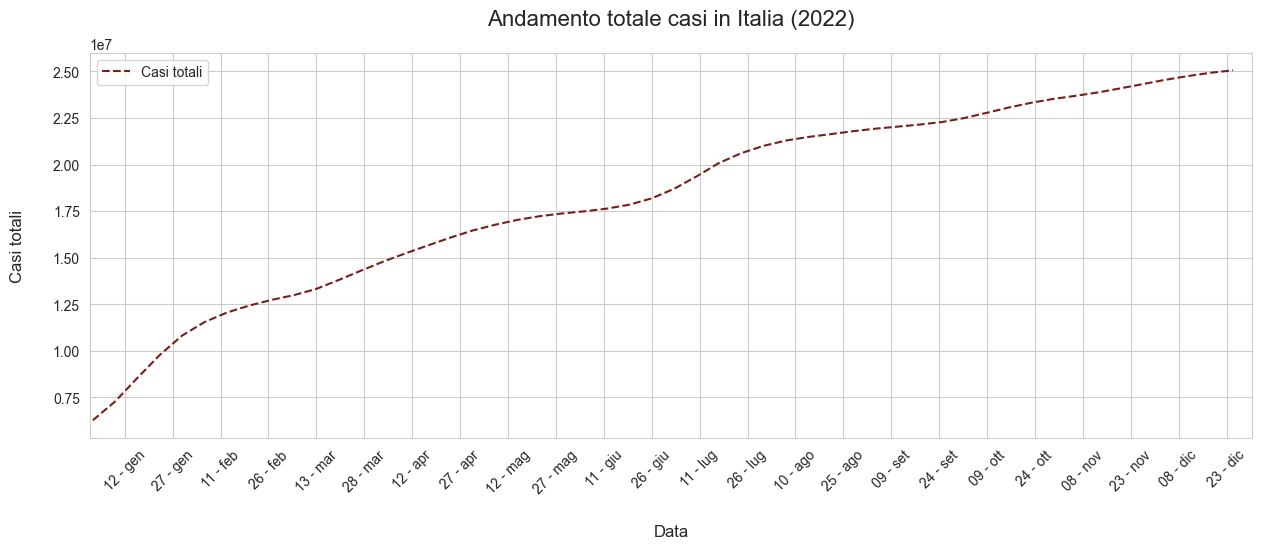

In [9]:
import datetime
import matplotlib.dates as mdates
# Trasformo la colonna 'date' in un oggetto datetime
df_Covid['date'] = pd.to_datetime(df_Covid['date'], yearfirst=True)
df_Covid['year'] = df_Covid['date'].dt.year
# Creo un filtro per selezionare solo i dati in italia del 2022
filtro_italia_2020 = (df_Covid['location'] == 'Italy') & (df_Covid['year'] == 2022)
# Creo un df filtrato
df_Covid_italia_2022 = df_Covid[filtro_italia_2020]
# elimino le righe con i valori di new_cases 0
df_Covid_italia_2022 = df_Covid_italia_2022[df_Covid_italia_2022['new_cases'] != 0]

# Creo il grafico settando stile e dimensioni 
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))
fig_italia_totali_2022 = sns.lineplot(x="date", y="total_cases", data=df_Covid_italia_2022, color='#781f19', linestyle='--')

# Modifico il formato della data sull'asse x
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d - %b'))
plt.xlim(left=datetime.datetime(2022, 1, 1), right=datetime.datetime(2022, 12, 31))
plt.xticks(rotation=45)

# Aggiungo titoli e etichette
plt.xlabel('Data', fontsize=12, labelpad=20)
plt.ylabel('Casi totali', fontsize=12, labelpad=20)
plt.legend(['Casi totali'])
plt.title('Andamento totale casi in Italia (2022)', y=1.05, fontsize=16)

Text(0.5, 1.05, 'Andamento nuovi casi per settimana in Italia (2022)')

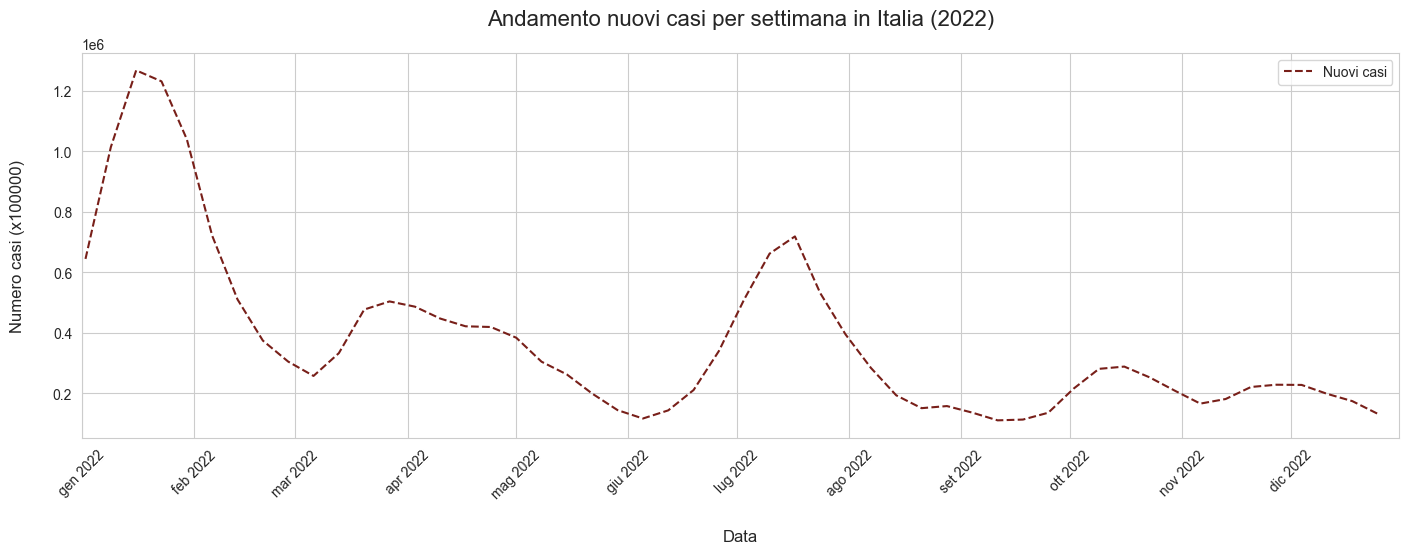

In [10]:
plt.figure(figsize=(17, 5))

# Lineplot per i casi totali
sns.lineplot(
    x="date",
    y="new_cases",
    data=df_Covid_italia_2022,
    color='#781f19',
    linestyle='--', 
    label='Nuovi casi'
)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xlim(left=datetime.datetime(2022, 1, 1), right=datetime.datetime(2022, 12, 31))
plt.xlabel('Data', labelpad=20, fontsize=12)
plt.ylabel('Numero casi (x100000)', labelpad=20, fontsize=12)
plt.xticks(rotation=45)
plt.title('Andamento nuovi casi per settimana in Italia (2022)', fontsize=16, y=1.05)


# Riguardo le nazioni di Italia, Germania e Francia:
# a. mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU, considerare quindi la colonna icu_patients) da maggio 2022 (incluso) ad aprile 2023 (incluso)
# b. scrivere un breve commento (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante

Text(0.5, 1.05, 'Distribuzione dei pazienti in terapia intensiva (Maggio 2022- Aprile 2023)')

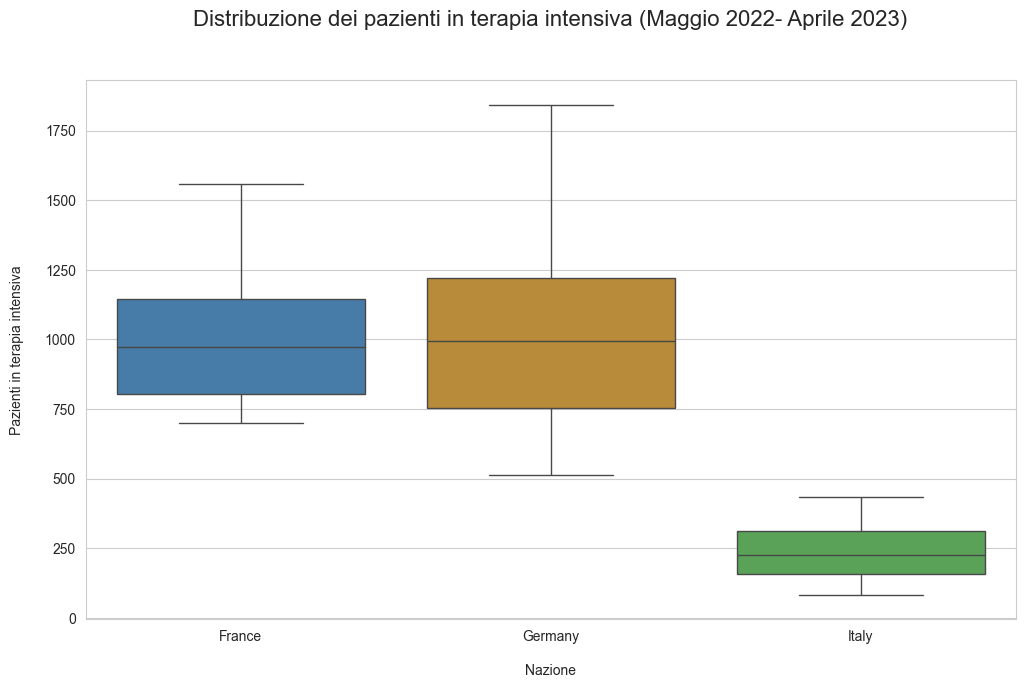

In [11]:
# Filtro il dataset
filtro_tempo_naz = (df_Covid['location'].isin(['Italy', 'France', 'Germany'])) & (df_Covid['date'] >= '2022-05-01') & (df_Covid['date'] <= '2023-04-30')
df_Covid_TN = df_Covid[filtro_tempo_naz]

# Creo un dizionario per i colori da assegnare a ogni nazione
palette = {'Italy': '#4daf4a', 'France': '#377eb8', 'Germany': "#cc9124"}

# Creo un boxplot per i pazienti in terapia intensiva
plt.figure(figsize=(12, 7))
sns.boxplot(x='location', y='icu_patients', data=df_Covid_TN, hue='location', palette=palette)
plt.xlabel('Nazione', labelpad=15)
plt.ylabel('Pazienti in terapia intensiva', labelpad=15)
plt.title('Distribuzione dei pazienti in terapia intensiva (Maggio 2022- Aprile 2023)', pad=20, fontsize=16, y=1.05, loc='center')

Da questo grafico si evince chiaramente che mentre Germania e Francia in quel periodo si siano attestate ad un numero simile di pazienti in terapia intensiva, mentre l'Italia ha in media meno di un quarto dei posti occupati. Si vede anche una maggior costanza dei numeri italiani. Sembrerebbe quindi che l'italia si sia comportata meglio in generale nel periodo, anche e soprattutto ad evitare dei picchi di pazienti in TI.

## Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021:
## a. mostrare in maniera grafica oppure numerica il numero di pazienti per ognuna (colonna hosp_patients )
## b. se ci sono dati nulli, con un breve commento scrivere se è possibile gestirli tramite sostituzione o meno

(0.0, 36000.0)

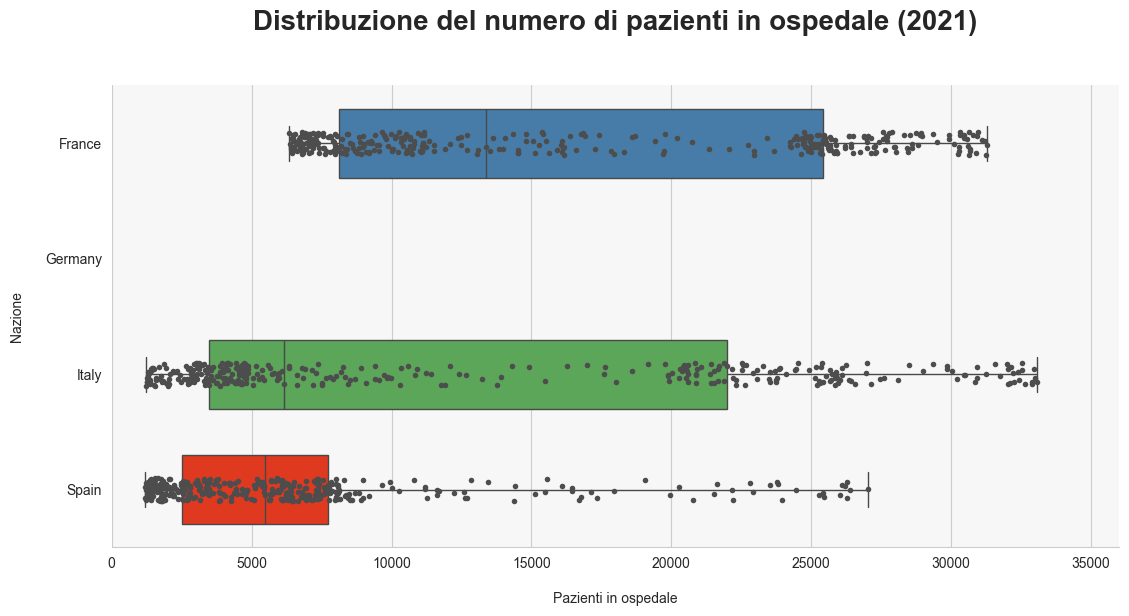

In [12]:
# Creo il filtro richiesto e seleziono delle colonne utili per sfoltire il dataset
filtro_naz_2021 = (df_Covid['location'].isin(['Italy', 'France', 'Germany', 'Spain'])) & (df_Covid['year'] == 2021)
df_Covid_Naz_2021 = df_Covid[filtro_naz_2021]

filtro_colonne = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases','hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million']
df_Covid_Naz_2021 = df_Covid_Naz_2021[filtro_colonne]

# Creo un grafico combinato con boxplot e stripplot per visualizzare la distribuzione del numero di pazienti in ospedale nel periodo
f, ax = plt.subplots(figsize=(13, 6))
ax.set_facecolor('#f7f7f7')
palette2 = {'Italy': "#50b34d", 'France': '#377eb8', 'Germany': "#cc9124", 'Spain': "#ff2200"}
sns.boxplot(
    data = df_Covid_Naz_2021, x="hosp_patients", y="location", hue="location",
    whis=[0, 100], width=.6, palette=palette2
)
sns.stripplot(data = df_Covid_Naz_2021, x="hosp_patients", y="location", size=4, color=".3")
sns.despine(top=True, left=True)
plt.title('Distribuzione del numero di pazienti in ospedale (2021)', pad=40, fontsize=20, fontweight='bold')
plt.xlabel('Pazienti in ospedale', labelpad=15)
plt.ylabel('Nazione', labelpad=15)
plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000])
plt.xlim(right=36000, left= 0)

## i dati nulli in questo caso sono assolutamente ingestibili in quanto mancanti per un intera categoria

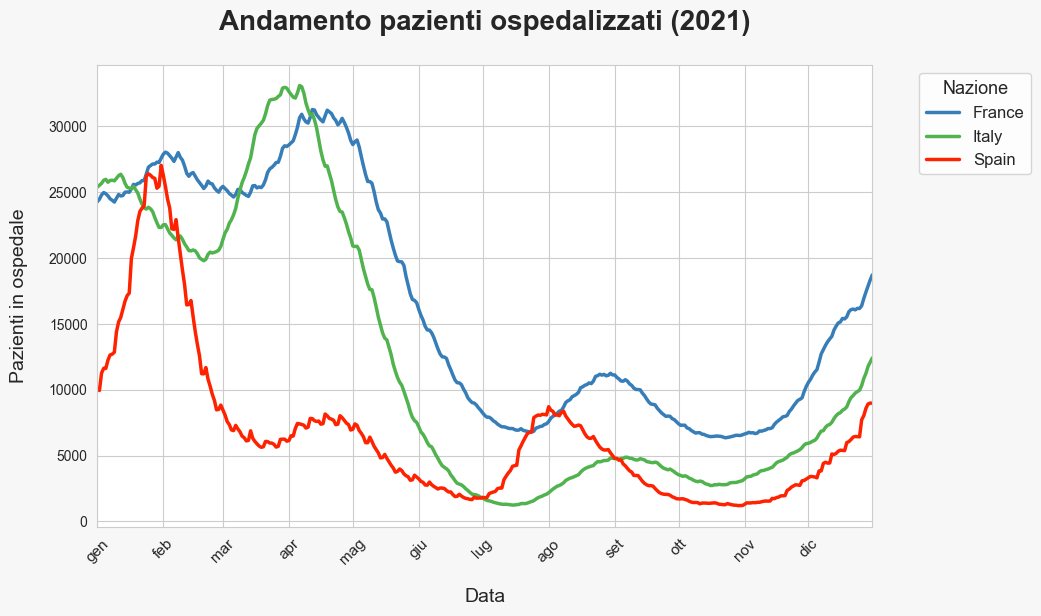

In [13]:
#Creo anche un grafico a linee per visualizzare l'andamento del numero di pazienti da integrare
ax = plt.figure(figsize=(10, 6))
filtro_nazioni = df_Covid_Naz_2021['location'] != 'Germany'
df_Covid_Naz_2021_No_Ger = df_Covid_Naz_2021[filtro_nazioni]
sns.lineplot(data=df_Covid_Naz_2021_No_Ger, x="date", y="hosp_patients", hue="location", palette=palette2,linewidth=2.5)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_facecolor('#f7f7f7')

plt.title('Andamento pazienti ospedalizzati (2021)', fontsize=20, pad=25, fontweight='bold')
plt.xlabel('Data', fontsize=14, labelpad=15)
plt.ylabel('Pazienti in ospedale', fontsize=14, labelpad=15)
plt.xlim(left=datetime.datetime(2021, 1, 1), right=datetime.datetime(2021, 12, 31))

plt.xticks(rotation=45, fontsize=11)

plt.legend(title='Nazione', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=13)

